# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
# install necessary libraries 
!pip install tomotopy

In [2]:
!pip install little_mallet_wrapper

In [1]:
#import necessary libraries
import tomotopy as tp  #for topic modeling
import little_mallet_wrapper   #for topic modeling
import seaborn as sns #for data visualization 
import matplotlib.pyplot as plt #for data visualization
import glob   #for working with files and the file system.
from pathlib import Path   #for working with files and the file system.
import pandas as pd  #for analyzing and processing datasets

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
# load the datasets of Sanders and Trump's tweets
Sanders = pd.read_csv('sanders_tweets.csv')
Trump = pd.read_csv('trump_tweets.csv')

In [4]:
#combine the two datasets
concatenated_df = pd.concat([Sanders, Trump], ignore_index=True)

In [5]:
concatenated_df.shape

(30371, 4)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [6]:
# Q4 (code)
# Imports the Natural Language Toolkit (NLTK) library for natural language processing tasks (https://www.nltk.org/)
import nltk
from nltk.corpus import stopwords #Imports the stopwords corpus from NLTK
from nltk.tokenize import word_tokenize # for tokenizing text into words
import string  # Imports the string module for cleaning punctuation

In [7]:
nltk.download('stopwords') #Downloads the stopwords corpus.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chengluotong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english')) # Creates a set of English stopwords from NLTK's stopwords corpus.
punctuation = set(string.punctuation) # Creates a set of punctuation characters from the string module.

In [9]:
import re # for working with regular expressions (https://docs.python.org/3/library/re.html). 

def preprocess_text(text):
    # Remove URLs, user mentions, special characters, and numeric patterns
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|[\W\d_]+", ' ', text, flags=re.MULTILINE)
    # Tokenize text
    tokens = word_tokenize(processed_text.lower())
    # Remove stopwords, punctuation, and numbers
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation and not token.isdigit()]
    # Join tokens back into text
    return ' '.join(filtered_tokens)

In [10]:
# Add the processed text to a list called training_data. 
training_data = [preprocess_text(content) for content in concatenated_df['Content']]
# Create a list with the content of the tweets (original_texts).
original_texts = list(concatenated_df['Content'])
# Creates a list of titles by concatenating the 'Username' and 'TweetId' columns for each row in the DataFrame df_concat.
titles = [f"{row['Username']}_{row['TweetId']}" for _, row in concatenated_df.iterrows()]

In [11]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [12]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 15

In [13]:
# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.178592708138295
Iteration: 10	Log-likelihood: -8.783665283352114
Iteration: 20	Log-likelihood: -8.613254196692546
Iteration: 30	Log-likelihood: -8.53609522556485
Iteration: 40	Log-likelihood: -8.487292611752677
Iteration: 50	Log-likelihood: -8.456685162260335
Iteration: 60	Log-likelihood: -8.436882129314732
Iteration: 70	Log-likelihood: -8.42148947675452
Iteration: 80	Log-likelihood: -8.407804896876488
Iteration: 90	Log-likelihood: -8.398029205810026
Iteration: 100	Log-likelihood: -8.389166911482022
Iteration: 110	Log-likelihood: -8.382569618664569
Iteration: 120	Log-likelihood: -8.37537721471554
Iteration: 130	Log-likelihood: -8.371926844696338
Iteration: 140	Log-likelihood: -8.363293443791026
Iteration: 150	Log-likelihood: -8.361959841924211
Iteration: 160	Log-likelihood: -8.359103117196872
Iteration: 170	Log-likelihood: -8.356751967300115
Iteration: 180	Log-likelihood: -8.354061382694827
Iteration: 190	Log-likelihood: -8.3551

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [99]:
# Q5a (code)
# Print out top 15 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

rt trump fbi collusion russia witch hunt mueller amp campaign hillary obama clinton report comey

✨Topic 1✨

news fake amp media great people would even good much never like big many years

✨Topic 2✨

great vote thank state big amp endorsement total maga strong military complete amendment governor vets

✨Topic 3✨

tax workers people americans million working billion trump pay wage american class jobs need year

✨Topic 4✨

people health must care country right american trump americans war us need every stand america

✨Topic 5✨

china trade u jobs drug deal energy companies climate change must prices industry tariffs countries

✨Topic 6✨

rt realdonaldtrump president trump whitehouse thank live today america tonight new coronavirus american news teamtrump

✨Topic 7✨

border amp democrats people country want wall security must get great many states law would

✨Topic 8✨

great thank today amp rt honor president united states day north korea whitehouse fir

#### Q5b (words)
#### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

1. Topic 0: The key words suggest the theme of Trump administration ("trump") and Trump campaign's actions ("campaign"), particularly focusing on discussions related to the FBI, collusion allegations with Russia, the Mueller investigation often labeled as a "witch hunt," and the subsequent report ("fbi," "collusion," "russia," "witch," "hunt," "mueller," "report"). These discussions intertwine with mentions of key political figures such as Hillary Clinton, Barack Obama, and James Comey (""obama," "hillary," "clinton," "comey").
2. Topic 1: The topic suggests the discussions related to the media outlets ("media"), particularly focusing on the news and fake news ("news," "fake," "), reflecting the skepticism towards certain news sources. There might be a reflection on public perception, such as the positive sentiments towards certain groups or communities ("people," "great," "good"). 
3. Topic 2: This topic might concern the expressions of gratitude, political endorsements, and discussions related to the strength and support for particular candidates ("great," "vote," "thank," "endorsement"). There might be discussions about defense, legislation, or constitutional matters ("military," "amendment"). Mentions of "maga" (Make America Great Again) reflect alignment with a particular political movement or ideology. The word "governor" implies discussions related to gubernatorial races. Additionally, "vets" likely refers to veterans, perhaps indicating discussions of supporting or honoring military veterans.
4. Topic 3: This topic suggests the theme related to taxation, particularly focusing on Trump administration's policies concerning tax and job, and issues about social justice and equality ("tax," "workers," "job," "trump," "pay"). It might be about the distribution of wealth and the economic well-being of working-class Americans ("million," "billion," "wage," "worker," "class"). 
5. Topic 4: This topic delves into Trump's healthcare policies, related to the health and well-being of all individuals in the nation ("Trump," "people," "health," "care," "country"). It also explores fundamental rights, particularly the right to healthcare and the welfare of American citizens ("right," "American"). Moreover, discussions extend to Trump's approaches to national security ("war"). The discourse suggests a call for advocacy to tackle urgent national challenges, encouraging individuals to assert their rights and values in America ("need," "stand," "America").
6. Topic 5: This topic focuses on discussions surrounding trade relations with other countries, particularly concerning China ("China," "trade," "tariffs," "countries"). It also addresses economic matters such as job and the impact of trade deals on industries ("jobs," "deal," "industry"). Moreover, there's a focus on energy policies and climate change concerns ("energy," "climate," "change"). The discourse suggests a need for addressing issues related to drug prices and industry regulations ("drug," "prices," "industry"). 
7. Topic 6: This topic revolves around discussions related to president Trump's administration and White House activities ("realdonaldtrump," "president," "trump," "whitehouse," "teamtrump"). It also includes expressions of gratitude for various events ("thank," "live," "today," "america"). Additionally, there's a focus on news updates, particularly concerning the coronavirus pandemic and American news outlets ("coronavirus," "american," "news"). 
8. Topic 7: This topic indicates the discussions related to border security, immigration policies, and the construction of a border wall, particularly in the context of President Trump's agenda ("border," "democrats," "people," "country," "want," "wall," "security"). There's a emphasis on the need for enhanced security measures and stricter immigration laws to address concerns about border control and national security ("must," "get," "great," "many," "states," "law"). Additionally, there is perhpas endorsement of individuals and organizations aligned with these views, emphasizing their commitment to American values ("endorsement," "American," "patriots").
9. Topic 8: This topic centers on expressions of gratitude towards significant individuals and events, particularly in the context of the presidency ("great," "thank," "president," "united states"), reflecting a sense of pride and appreciation for American values and achievements ("honor," "today,"  "whitehouse," "happy"). Additionally, the discourse includes references to international engagements, such as diplomatic efforts with North Korea, highlighting efforts to promote peace and cooperation ("north," "korea").
10. Topic 9: This topic indicates discussions related to the impeachment proceedings against President Trump, initiated by Democrats ("impeachment," "democrats," "joe," "biden," "president," "trump," "election," "house," "senate," "vote," "schiff," "pelosi"). 




#### Manually evaluate coherence
1. Topic 0 (high): The coherence is high because the keywords are tightly connected and represent a well-defined subject that is the investigation into alleged collusion between the Trump campaign and Russia.
2. Topic 1 (high): The coherence is high because the keywords consistently contribute to the discussion of media criticism and fake news.
3. Topic 2 (moderate): While the keywords in this topic generally relate to expressions of gratitude and endorsements, some terms like "strong," "military," "complete," "amendment," and "governor," "vets" may not directly align with the main theme.
4. Topic 3 (high): The coherence is high because all keywords are tightly connected and contribute to the discussion of economic concerns.
5. Topic 4 (moderate): The top keywords in this topic relate to healthcare, such as "health," "care," but some terms like "war" may not directly align with the main theme.
6. Topic 5 (high): All keywords are tightly connected and relate to the discussion of trade relations and economic deals.
7. Topic 6 (high): All keywords are related to the discussion of presidential updates and news.
8. Topic 7 (high): All keywords are tightly connected and contribute to the discussion of border security and immigration.
9. Topic 8 (high): The keywords in this topic are all related to expressions of gratitude and honors.
10. Topic 9 (high): The keywords generally relate to impeachment proceedings against President Trump, initiated by Democrats.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [166]:
# Initial coherence score (topic number is 10)
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5726098306104541 
Per Topic: [0.691302266716957, 0.5520007997751236, 0.6277907997369766, 0.6038874365389347, 0.5612899579107762, 0.6010743468999863, 0.5287463292479515, 0.508759132027626, 0.4597751062363386, 0.5914721310138702]



In [16]:
# Retrain the model (Change topic numbers: 15)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 15

In [17]:
# Intialize the model
model1 = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model1.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model1.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model1.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.324080262093329
Iteration: 10	Log-likelihood: -8.90344528720107
Iteration: 20	Log-likelihood: -8.72029943652457
Iteration: 30	Log-likelihood: -8.621383414619686
Iteration: 40	Log-likelihood: -8.556270298359198
Iteration: 50	Log-likelihood: -8.513884300379237
Iteration: 60	Log-likelihood: -8.47516147554981
Iteration: 70	Log-likelihood: -8.452958049107757
Iteration: 80	Log-likelihood: -8.430507441988233
Iteration: 90	Log-likelihood: -8.414850041125696
Iteration: 100	Log-likelihood: -8.400025780500759
Iteration: 110	Log-likelihood: -8.388636089649687
Iteration: 120	Log-likelihood: -8.378832156543737
Iteration: 130	Log-likelihood: -8.368030476986112
Iteration: 140	Log-likelihood: -8.363490646900175
Iteration: 150	Log-likelihood: -8.355529471736912
Iteration: 160	Log-likelihood: -8.351985756465313
Iteration: 170	Log-likelihood: -8.349747416700628
Iteration: 180	Log-likelihood: -8.341694158487924
Iteration: 190	Log-likelihood: -8.3434

In [191]:
# change topic nnumber to 15 
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model1, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model1.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5861092356095711 
Per Topic: [0.7630014091730117, 0.5573180481791496, 0.7415271639823914, 0.5645576983690261, 0.5701584696769715, 0.5947525456547738, 0.5196511715650558, 0.5803201749920845, 0.6413601815700531, 0.42206575386226175, 0.5262949526309967, 0.6351992666721344, 0.4956062749028206, 0.5492878496646881, 0.630537573248148]



In [18]:
# Retrain the model (Change topic numbers: 20)
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 15
# Intialize the model
model2 = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model2.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model2.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model2.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.414676254271683
Iteration: 10	Log-likelihood: -8.901126698325697
Iteration: 20	Log-likelihood: -8.697171095181995
Iteration: 30	Log-likelihood: -8.589374635501548
Iteration: 40	Log-likelihood: -8.51701155903229
Iteration: 50	Log-likelihood: -8.473447627366859
Iteration: 60	Log-likelihood: -8.441083192850341
Iteration: 70	Log-likelihood: -8.415644779304811
Iteration: 80	Log-likelihood: -8.395117882733377
Iteration: 90	Log-likelihood: -8.37624166870186
Iteration: 100	Log-likelihood: -8.365167659596995
Iteration: 110	Log-likelihood: -8.353798346682593
Iteration: 120	Log-likelihood: -8.345763314511197
Iteration: 130	Log-likelihood: -8.33421901787821
Iteration: 140	Log-likelihood: -8.329801509723552
Iteration: 150	Log-likelihood: -8.324401190221048
Iteration: 160	Log-likelihood: -8.322521672480176
Iteration: 170	Log-likelihood: -8.316810543422061
Iteration: 180	Log-likelihood: -8.313770576422666
Iteration: 190	Log-likelihood: -8.3104

In [21]:
# change topic nnumber to 20 (repeat the above code for model retraining)
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model2, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model2.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.6122649274393916 
Per Topic: [0.6101683288812637, 0.6478043347597122, 0.5270589292049408, 0.48152542263269427, 0.6879477813839913, 0.7050240963697434, 0.6566238433122635, 0.6684885829687118, 0.6362192675471305, 0.6248700112104416, 0.6267645001411438, 0.505397629737854, 0.6485769852995873, 0.6290788322687149, 0.5972071513533592, 0.7822072267532348, 0.5114316441118717, 0.5790771052241326, 0.5384545177221298, 0.581372357904911]



In [19]:
# Retrain the model (Change topic numbers: 25)
# Number of topics to return
num_topics = 25
# Numer of topic words to print out
num_topic_words = 15
# Intialize the model
model3 = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model3.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model3.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model3.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.457284896370485
Iteration: 10	Log-likelihood: -8.970811402192924
Iteration: 20	Log-likelihood: -8.761121253486955
Iteration: 30	Log-likelihood: -8.655814239370462
Iteration: 40	Log-likelihood: -8.582285389592831
Iteration: 50	Log-likelihood: -8.525188351097219
Iteration: 60	Log-likelihood: -8.488013902217023
Iteration: 70	Log-likelihood: -8.455702307055125
Iteration: 80	Log-likelihood: -8.430412474500246
Iteration: 90	Log-likelihood: -8.408266319703374
Iteration: 100	Log-likelihood: -8.387052594000275
Iteration: 110	Log-likelihood: -8.375653469660547
Iteration: 120	Log-likelihood: -8.360357584651982
Iteration: 130	Log-likelihood: -8.349771840638939
Iteration: 140	Log-likelihood: -8.337195646103945
Iteration: 150	Log-likelihood: -8.328609188462659
Iteration: 160	Log-likelihood: -8.323791974184148
Iteration: 170	Log-likelihood: -8.316848582193947
Iteration: 180	Log-likelihood: -8.309754095070831
Iteration: 190	Log-likelihood: -8.3

In [197]:
# change topic nnumber to 25 (repeat the above code for model retraining)
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model3, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model3.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5839595552571119 
Per Topic: [0.6912006556987762, 0.7027029663324356, 0.630398827791214, 0.5793937008827925, 0.5436289981007576, 0.5678065568208694, 0.5458141386508941, 0.5608032792806625, 0.5658859848976135, 0.5222638741135597, 0.44452922865748407, 0.6721071869134903, 0.5321031212806702, 0.5617120527662337, 0.6039972335100174, 0.4868095278739929, 0.6769493222236633, 0.629034823179245, 0.6026954382658005, 0.58223547488451, 0.6827460721135139, 0.6223051562905312, 0.46164852008223534, 0.5068113319575787, 0.6234054088592529]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

#### Q6 (words)
- Initial number of topics: 10
- Initial average coherence score: 0.5726098306104541

For the initial experiment, this coherence score indicates a moderate level of coherence among the topics generated by the model.
##### Change topic numbers:
- Number of topics: 15
- Average coherence score: 0.5861092356095711

In the first modification, the number of topics was increased to 15. As a result, the average coherence score improved to 0.5861. This indicates a slight enhancement in the coherence of the topics compared to the initial experiment.

- Number of topics: 20
- Average coherence score: 0.6122649274393916

In the second modification, the number of topics was further increased to 20. This adjustment led to a higher average coherence score of 0.6123, indicating a more coherent topic model compared to the previous experiments.

- Number of topics: 25
- Average coherence score: 0.5839595552571119

In the final modification, the number of topics was increased to 25. However, this adjustment resulted in a slightly lower average coherence score of 0.5840 compared to the previous experiment with 20 topics.

##### Conclusion:
The experiments demonstrate that increasing the number of topics generally improves the coherence of the topics generated by the model. However, there may be diminishing returns or fluctuations in coherence scores as the number of topics increases beyond a certain threshold. In this case, the most coherent arrangement of topics was achieved with 20 topics, yielding the highest average coherence score of 0.6123.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

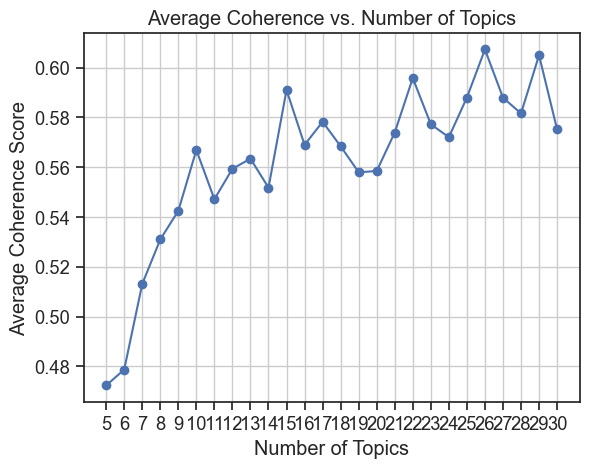

In [20]:
def plot_coherence(start_topic_num, end_topic_num, training_data):
    average_coherence_list = [] # Initialize an empty list
    topics_num_list = range(start_topic_num, end_topic_num + 1) # This list contains the topic number range
    
    for topic_num in topics_num_list:  # Iterate over each topic number
        model4 = tp.LDAModel(k=topic_num)
        
        for tweet in training_data:
            model4.add_doc(tweet.strip().split())
        
        iteration_num = 10 # Set the number of training iterations
        
        for i in range(0, iteration_num):
            model4.train(iteration_num)
        
        coh = tp.coherence.Coherence(model4, coherence='c_v')
        average_coherence_list.append(coh.get_score())
    
    plt.plot(topics_num_list, average_coherence_list, marker='o') 
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(topics_num_list)  # Ensure integer ticks on x-axis
    plt.grid(True) # Add grid lines for better readability
    plt.show()

# Example usage:
# plot coherence scores for topic numbers from 5 to 30
plot_coherence(5, 30, training_data)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [24]:
# We use the model with 20 topics trained before due to its highest coherence score
# Retrieve topic distributions for all documents
topic_distributions = [list(doc.get_topic_dist()) for doc in model2.docs]

In [25]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 15

In [35]:
# Print out top 15 words for each topic for the new topic model (topic = 20)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model2.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

great president today house rt white thank whitehouse honor meeting minister prime national forward united

✨Topic 1✨

news fake media amp cnn even story new like bad people never times ratings corrupt

✨Topic 2✨

people great would country many much get done years time never one good like going

✨Topic 3✨

rt amp federal law state new local help hurricane covid government police fema enforcement york

✨Topic 4✨

trump fbi rt russia collusion witch amp hunt mueller campaign hillary obama clinton report comey

✨Topic 5✨

drug change climate energy must prices fossil industry companies planet fuel americans prescription price drugs

✨Topic 6✨

rt impeachment president democrats schiff house call realdonaldtrump senate whistleblower ukraine nothing jim adam jordan

✨Topic 7✨

health care people right must every americans country need million insurance medicare make millions leave

✨Topic 8✨

china trade u states amp deal united korea countries north doll

In [27]:
# Calculate the topic distributions for all tweets
# Create a list to store the results
topic_results = []

# Iterate over the titles and topic distributions
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

# Create a DataFrame from the results
df = pd.DataFrame(topic_results)

# Extract the topic words as column names
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]

# Split the topic distributions into separate columns
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index=df.index)

# Drop the 'topic_distribution' column
df = df.drop('topic_distribution', axis='columns')

# Display the DataFrame
df

,document,Topic 0 great president today house,Topic 1 news fake media amp,Topic 2 people great would country,Topic 3 rt amp federal law,Topic 4 trump fbi rt russia,Topic 5 drug change climate energy,Topic 6 rt impeachment president democrats,Topic 7 health care people right,Topic 8 china trade u states,...,Topic 10 biden democrats joe amp,Topic 11 rt realdonaldtrump president trump,Topic 12 tax workers billion working,Topic 13 vote election great thank,Topic 14 court supreme new great,Topic 15 great endorsement total complete,Topic 16 great thank america rt,Topic 17 border wall security must,Topic 18 people must trump war,Topic 19 rt trump realdonaldtrump president
0,SenSanders_1351670845639421952,0.001733,0.002172,0.036852,0.001457,0.002094,0.001156,0.001956,0.001996,0.001810,...,0.002494,0.002248,0.929568,0.001721,0.001281,0.001103,0.002065,0.001686,0.003436,0.002782
1,SenSanders_1351259762722279424,0.002472,0.003099,0.009918,0.002079,0.002987,0.001649,0.002790,0.088150,0.002582,...,0.003558,0.003207,0.856875,0.002455,0.001827,0.001574,0.002946,0.002406,0.004901,0.003969
2,SenSanders_1351242822293319680,0.003752,0.004704,0.274026,0.003156,0.004534,0.002503,0.004235,0.004321,0.003919,...,0.005401,0.004869,0.005832,0.003727,0.002774,0.002389,0.069214,0.003651,0.007440,0.006024
3,SenSanders_1350885541911400448,0.002277,0.002855,0.087737,0.001915,0.120650,0.001519,0.002570,0.002623,0.120277,...,0.003278,0.002955,0.003540,0.002262,0.001684,0.001450,0.199211,0.002216,0.436808,0.003657
4,SenSanders_1349880150041780224,0.002037,0.002554,0.008175,0.072023,0.002462,0.001359,0.002299,0.002346,0.002128,...,0.038087,0.002644,0.495332,0.002024,0.001506,0.001297,0.002428,0.001983,0.355586,0.003271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29208,@realDonaldTrump_1323141683014520837,0.003322,0.004165,0.299932,0.002794,0.004014,0.002216,0.003749,0.061147,0.003470,...,0.004782,0.004310,0.005163,0.461865,0.117097,0.002115,0.003959,0.003233,0.006587,0.005333
29209,@realDonaldTrump_1323143076605579268,0.085005,0.005838,0.259731,0.566358,0.005627,0.003106,0.005255,0.005363,0.004864,...,0.006703,0.006042,0.007237,0.004626,0.003442,0.002965,0.005549,0.004532,0.009233,0.007476
29210,@realDonaldTrump_1323143378750590982,0.002834,0.003554,0.109193,0.295844,0.003425,0.001891,0.003199,0.003265,0.002961,...,0.101900,0.003678,0.004406,0.002816,0.002095,0.001805,0.443567,0.002758,0.005620,0.004551
29211,@realDonaldTrump_1323143751250907136,0.002834,0.003554,0.353743,0.002384,0.003425,0.001891,0.003199,0.003265,0.002961,...,0.004080,0.003678,0.004406,0.198455,0.002095,0.001805,0.394658,0.002758,0.005620,0.004551


In [46]:
# Q7a (code)

## Sanders
# Select Sanders's topics to explore
selected_topics = [7, 12, 18]
# Print top documents for each selected topic (Sanders)
for topic_id in selected_topics:
    print(f"Top documents for Topic {topic_id}:")
    # Sort documents based on probability of the selected topic
    top_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][topic_id], reverse=True)[:3] #get top 3 documents
    for doc_id, topic_dist in top_documents:
        print(f"Document {titles[doc_id]}: {training_data[doc_id]} (Probability: {topic_dist[topic_id]})")
    print()

Top documents for Topic 7:
Document SenSanders_1246889846922039296: economic meltdown millions americans food pantry feed kids money rent pay mortgage student debt medical bills say let wait see need get help people protect wellbeing (Probability: 0.9385634064674377)
Document SenSanders_1241066469926014976: senate gop plan send checks ignore many neediest couple making k senior getting k social security undocumented parents citizen children someone living disability payments student got laid (Probability: 0.9385634064674377)
Document SenSanders_1265990605605240832: million people work health industry health insurance americans working hospitals amid deadly pandemic without health coverage insane need medicare (Probability: 0.9325536489486694)

Top documents for Topic 12:
Document SenSanders_1322974802190213120: paid month netflix standard plan paid netflix paid federal income taxes year trump tax plan became law making million profit giving ceo million compensation package end oligarch

In [48]:
## Trump
# Select Trump's topics to explore
selected_topics = [4, 1, 11]
# Print top documents for each selected topic (Trump)
for topic_id in selected_topics:
    print(f"Top documents for Topic {topic_id}:")
    # Sort documents based on probability of the selected topic
    top_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][topic_id], reverse=True)[:3] #get top 3 documents
    for doc_id, topic_dist in top_documents:
        print(f"Document {titles[doc_id]}: {training_data[doc_id]} (Probability: {topic_dist[topic_id]})")
    print()

Top documents for Topic 4:
Document @realDonaldTrump_1162342307741523970: thank rudy (Probability: 0.9532798528671265)
Document @realDonaldTrump_1068339979250675712: alan dershowitz crimes mueller authority roving commissioner see evidence crimes illegal hoax ended immediately mueller refuses look real crimes side ig report (Probability: 0.9498752951622009)
Document @realDonaldTrump_1255696235970940934:  (Probability: 0.9498752951622009)

Top documents for Topic 1:
Document @realDonaldTrump_982682227581636608: sealing southern border people great country want safety security dems disaster important issue (Probability: 0.9549007415771484)
Document @realDonaldTrump_982722926305832960: lawmakers house judiciary committee angrily accusing department justice missing thursday deadline turning unredacted documents relating fisa abuse fbi comey lynch mccabe clinton emails much slow walking going bad (Probability: 0.953369140625)
Document @realDonaldTrump_1227561237782855680: congratulations at

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

#### # Q7b (words)
**The topics have top tweets (top 3) only by one politician**
**Representative of Sanders:**
- Topic 7 (health care, people, right, must, every, Americans, country, need, million, insurance, Medicare, make, millions, leave): This topic aligns with Sanders' emphasis on healthcare as a fundamental right for all Americans and his advocacy for policies like Medicare for All. He is a advocate for universal healthcare in the speech "Don’t tell me we can’t provide a good health care system guaranteeing health care to all of our people."
- Topic 12 (tax, workers, billion, working, Trump, people, wage, class, pay, million, Americans, America, corporations, must, year): This topic focuses on issues related to taxes and the working class, which are central themes in Sanders' political platform. Sanders advocates for tax reforms and emphasizes the income equality and addresses middle-class cuts.
- Topic 18 (people, must, Trump, war, American, United, States, country, end, Congress, President, stand, Iran): This topic reflects Sanders' stance against wars and his critique of Trump's foreign policy, particularly regarding military interventions and conflicts abroad, particularly regarding conflicts in the Middle East. 

**Representative of Trump:**
- Topic 11 (jobs, American, economy, record, years, since, thank, new, America, unemployment): The topic is related to economy and job, highlights job creation, economic growth, and low unemployment rates as indicators of his success as president. This topic aligns with Trump's narrative of a booming economy under his leadership.
- Topic 1 (news, fake, media, CNN, story, like, bad, people, never, times, ratings, corrupt): The topic is related to "fake news" and media ratings, a recurring theme in Trump's discourse. He often criticizes mainstream media outlets.
- Topic 4 (Trump, FBI, Russia, collusion, witch hunt, Mueller, campaign, Hillary, Obama, Clinton, report, Comey): This topic is about the investigations into Russian interference in the 2016 election and potential collusion with the Trump campaign. He dismissed these allegations as a "witch hunt" and has criticized the FBI. 

**Reference**
- Macaulay, M. (2019). Bernie and the Donald: A Comparison of Left- and Right-Wing Populist Discourse. In: Macaulay, M. (eds) Populist Discourse: International Perspectives. Palgrave Macmillan, Cham. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [49]:
# Crete a sample of tweets
from random import sample
# Set the number of tweets to sample
target_labels = sample(titles,100)

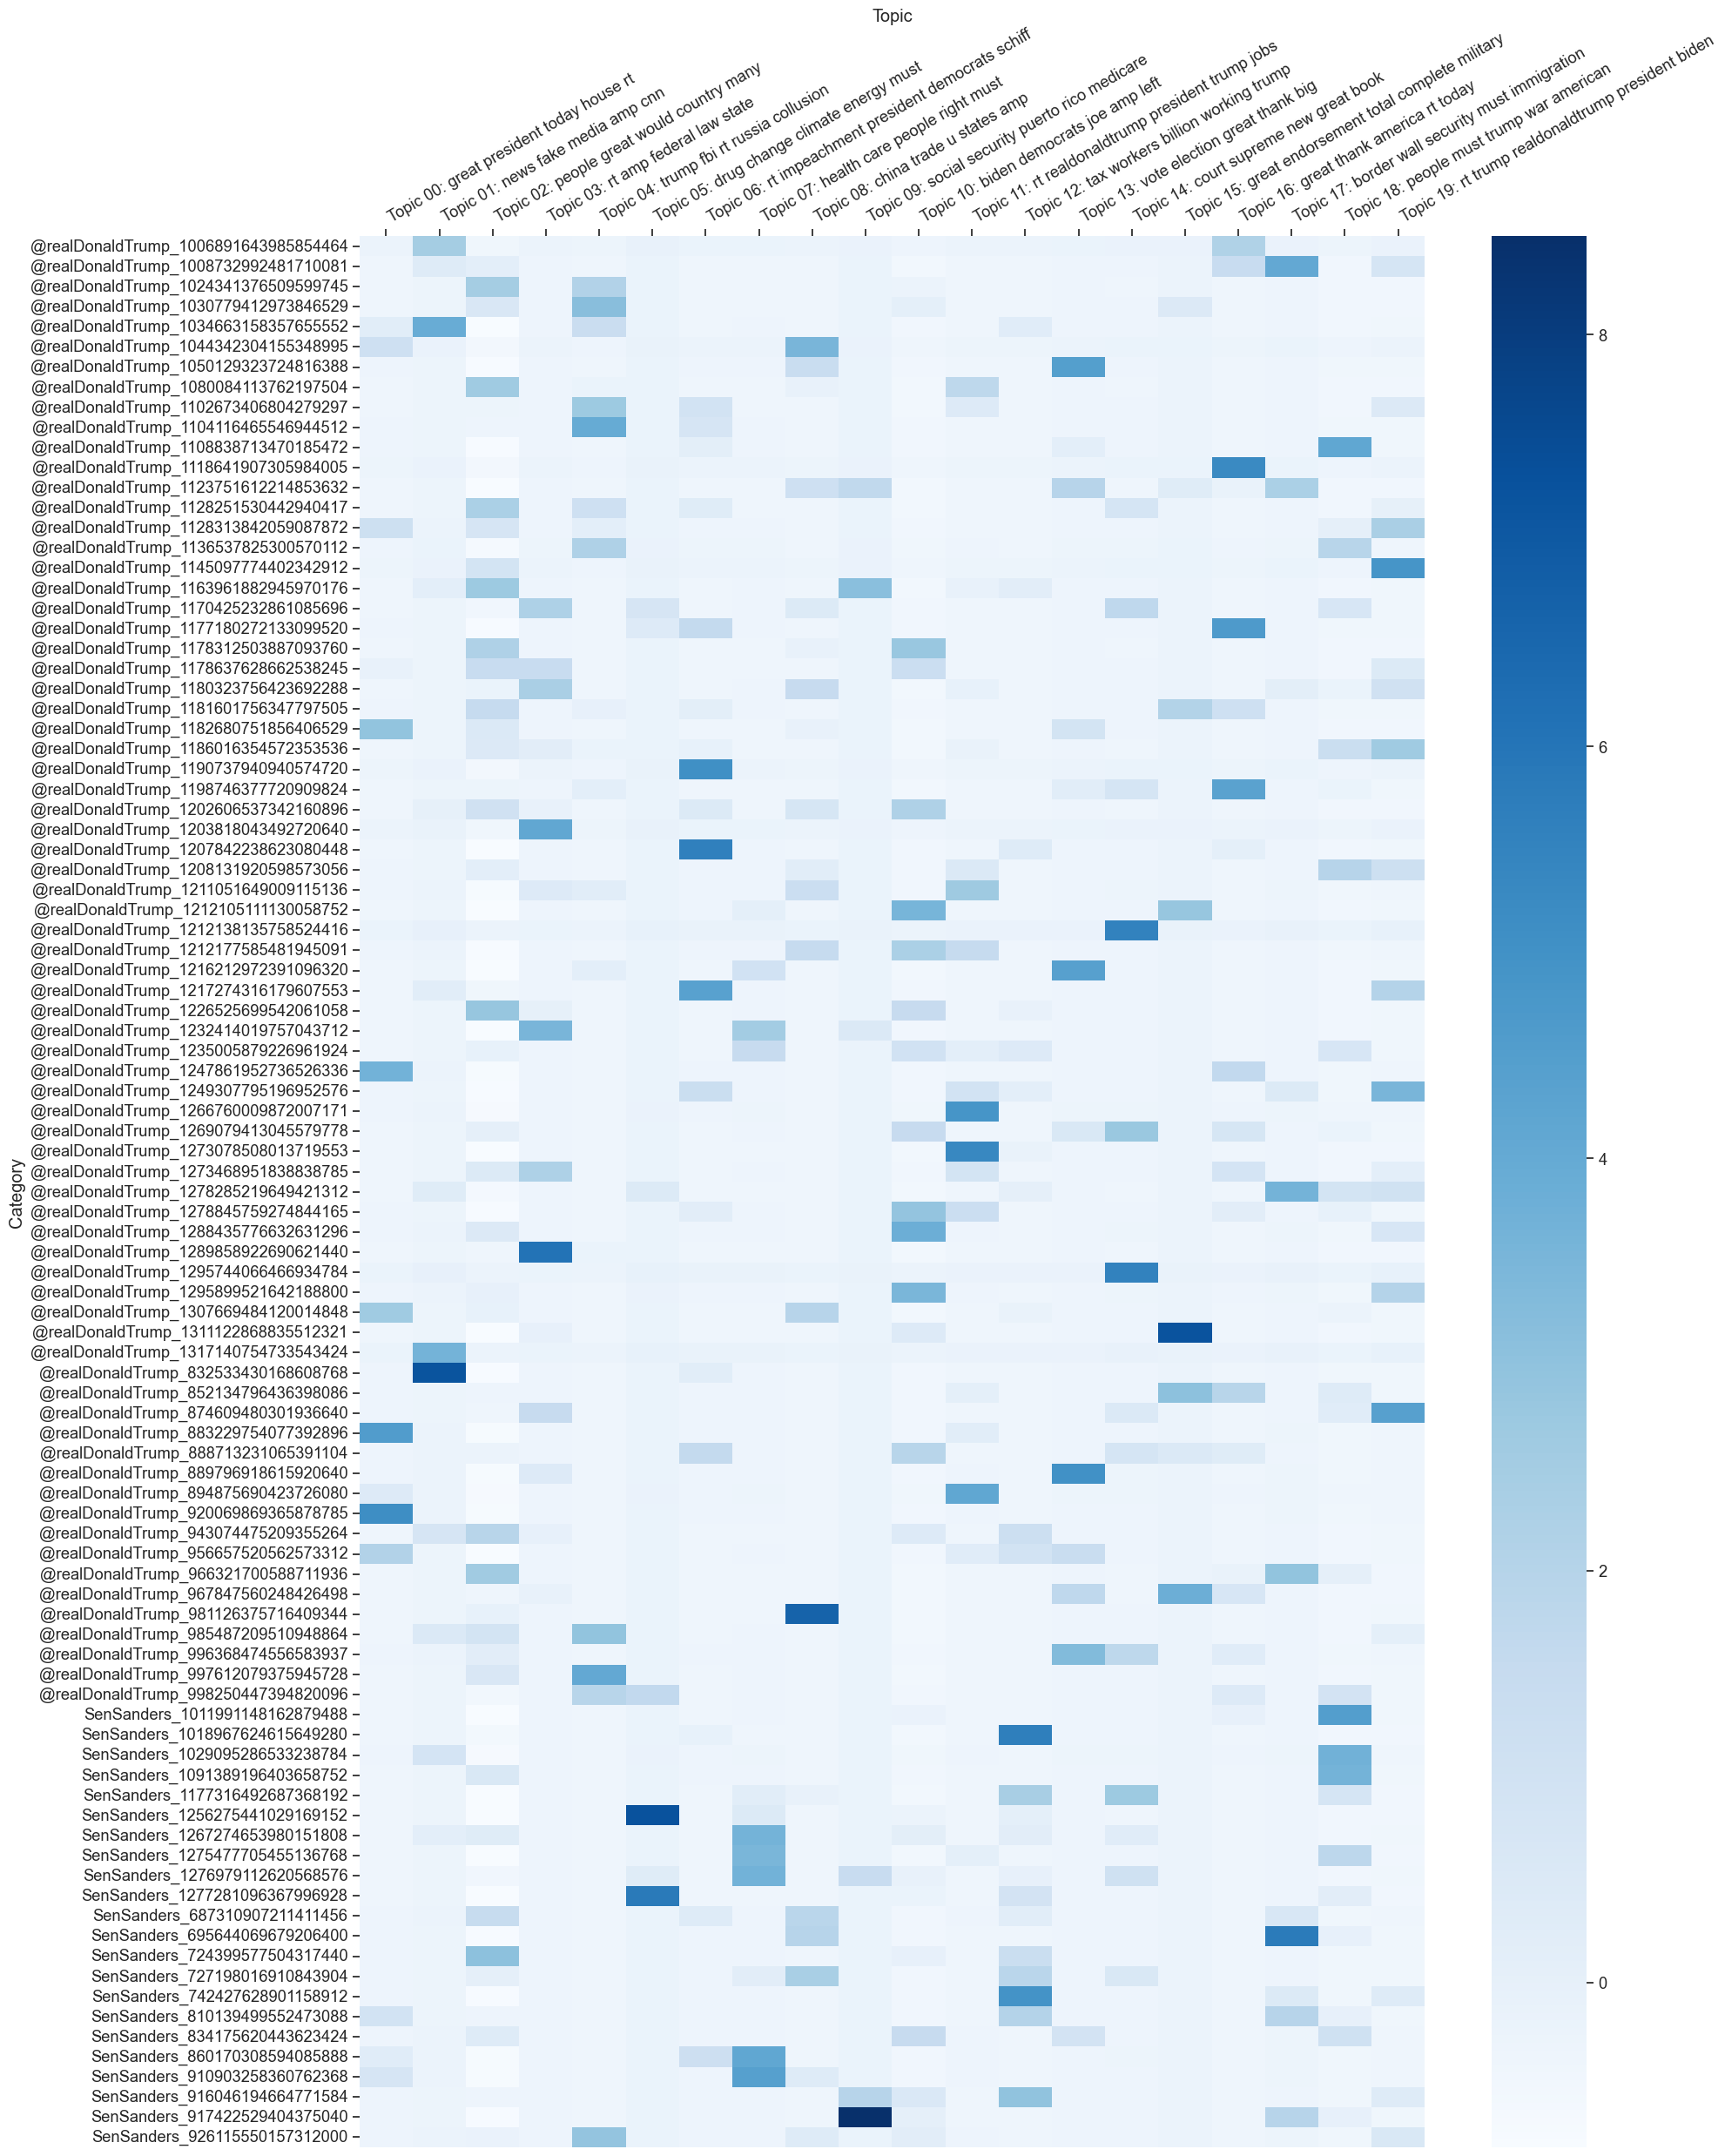

In [50]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the heatmap
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map='Blues',
                                  dim=(20, 25))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

#### Q9 (words)
Topics 5, 7, 12, and 18 appear to be more frequently discussed by Sanders. These topics revolve around issues such as healthcare, minimum wage, and climate change. Sanders' focus on these topics reflects his advocacy for progressive policies aimed at addressing economic inequality, healthcare accessibility, and environmental concerns.

On the other hand, topics 0, 1, 2, 4, 6, 10, 11, 16 and 19 are more prominently discussed by Trump. These topics cover a wide range of issues, such as patriotism, law enforcement, job and economy, and international relations. Trump's emphasis on these topics aligns with his campaign rhetoric.

Furthermore, Trump's speeches exhibit a distributed focus across various topics, indicating a broad spectrum of concerns addressed. In contrast, Sanders' speeches show a relatively more concentrated distribution, suggesting a narrower focus on specific policy areas.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [51]:
# X2 (code)

# Separate tweets by each candidate
Trump_tweets = [title for title in titles if 'Trump' in title]
Sanders_tweets = [title for title in titles if 'Sanders' in title]

# Sample 50 tweets from each candidate's tweets
Trump_sample = sample(Trump_tweets, 50)
Sanders_sample = sample(Sanders_tweets, 50)

# Combine the samples
balanced_sample = Trump_sample + Sanders_sample

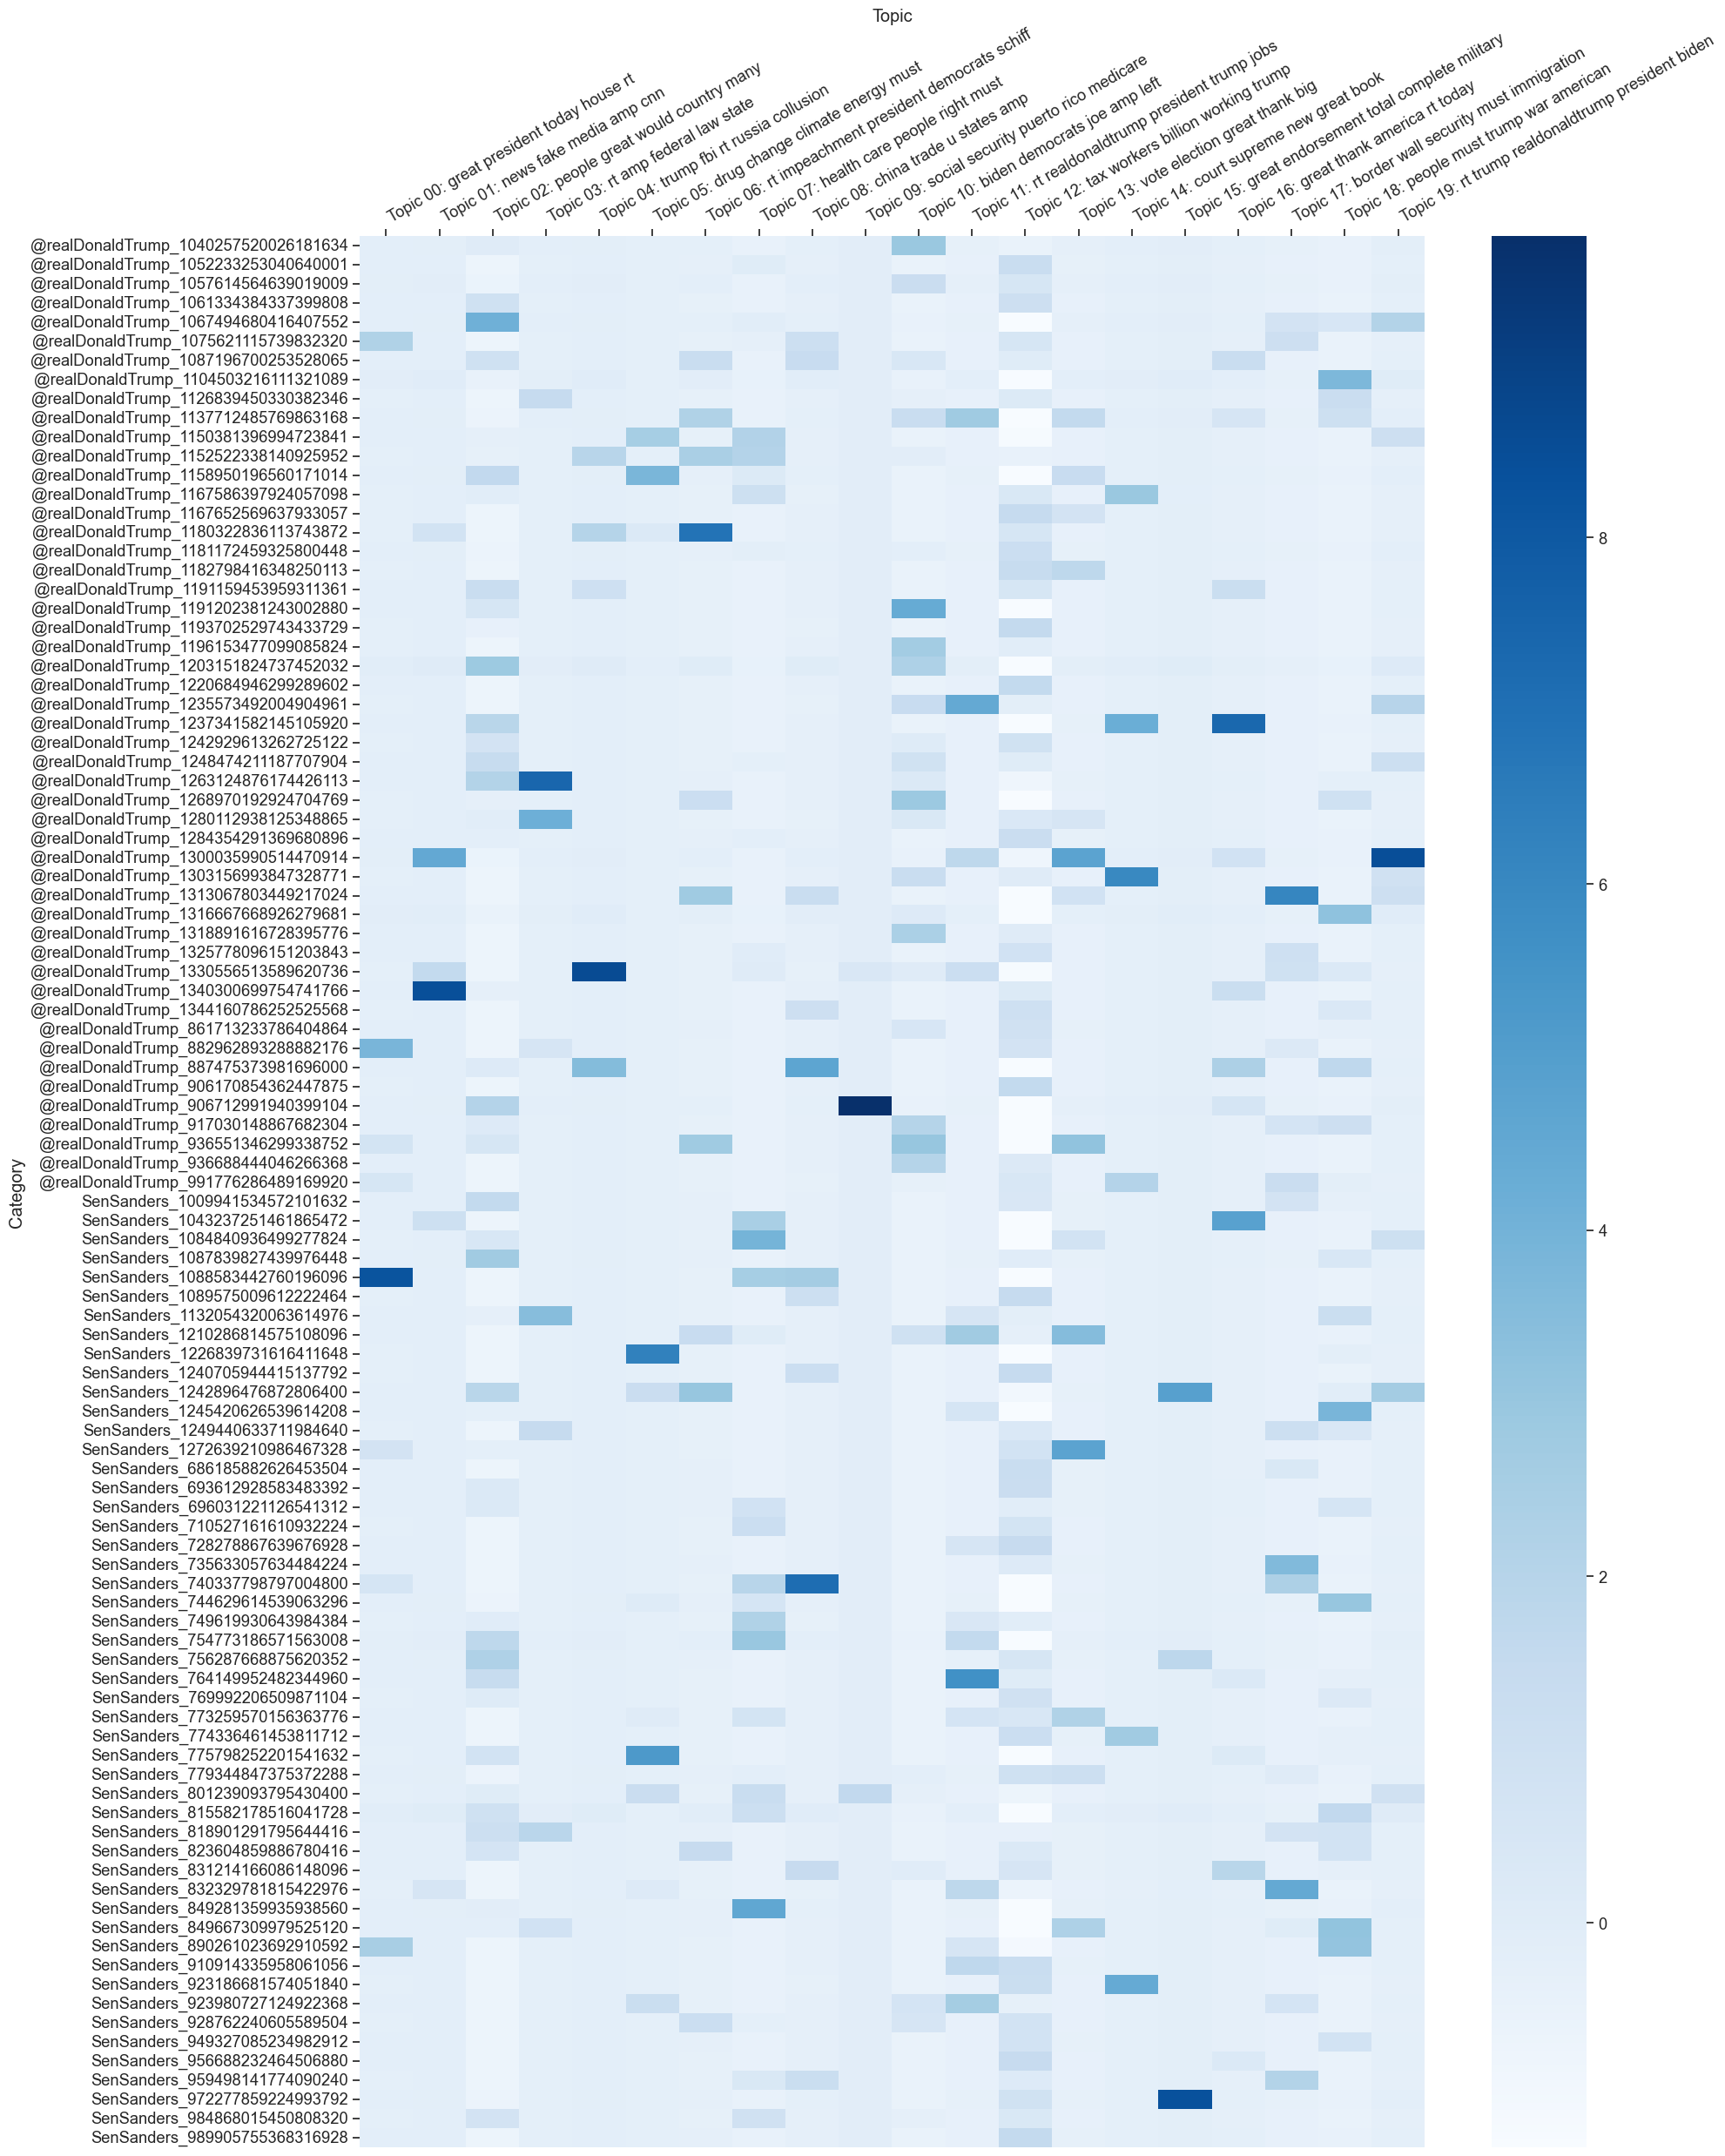

In [52]:
# Call the function to plot the heatmap with the balanced sample
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=balanced_sample,
                                  color_map='Blues',
                                  dim=(20, 25))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [59]:
# Initialize an empty list to store dictionaries
dicts_to_plot = []

# Iterate through each tweet and its corresponding topic distribution
for title, distribution in zip(titles, topic_distributions):
    # Iterate through each topic index and its probability in the distribution
    for topic_index, probability in enumerate(distribution):
        # Include probability, tweet title, and topic label with top keywords
        topic_label = 'Topic ' + str(topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[topic_index][:5])
        dicts_to_plot.append({'Probability': float(probability),
                              'Tweet': title,
                              'Topic': topic_label})

# Convert the list of dictionaries to a DataFrame
df_to_plot = pd.DataFrame(dicts_to_plot)

# Pivot the DataFrame
df_wide = df_to_plot.pivot_table(index='Tweet',
                                 columns='Topic',
                                 values='Probability')

# Normalize the values in each column (topic) by subtracting the mean and dividing by the standard deviation
df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

In [60]:
df_norm_col

Topic,Topic 00: great president today house rt,Topic 01: news fake media amp cnn,Topic 02: people great would country many,Topic 03: rt amp federal law state,Topic 04: trump fbi rt russia collusion,Topic 05: drug change climate energy must,Topic 06: rt impeachment president democrats schiff,Topic 07: health care people right must,Topic 08: china trade u states amp,Topic 09: social security puerto rico medicare,Topic 10: biden democrats joe amp left,Topic 11: rt realdonaldtrump president trump jobs,Topic 12: tax workers billion working trump,Topic 13: vote election great thank big,Topic 14: court supreme new great book,Topic 15: great endorsement total complete military,Topic 16: great thank america rt today,Topic 17: border wall security must immigration,Topic 18: people must trump war american,Topic 19: rt trump realdonaldtrump president biden
Tweet,,,,,,,,,,,,,,,,,,,,
@realDonaldTrump_1000061992042975232,0.535308,-0.358001,-0.392870,0.728321,-0.350310,-0.256937,-0.336478,-0.333895,5.051427,-0.145680,-0.397507,-0.357658,-0.385477,-0.314430,-0.277176,-0.240790,-0.343962,-0.319465,-0.449277,-0.412368
@realDonaldTrump_1000064605903876096,3.075100,-0.358001,-0.718918,-0.286091,-0.350310,-0.256937,-0.336478,-0.333895,0.128123,-0.145680,-0.397507,-0.357658,-0.385477,-0.314430,-0.277176,-0.240790,2.378738,-0.319465,-0.097829,-0.412368
@realDonaldTrump_1000114139136606209,-0.319912,-0.368980,-0.745572,-0.294782,-0.359618,0.684725,-0.077239,-0.343007,-0.328976,-0.149806,-0.410886,-0.368122,-0.395583,-0.323093,-0.286464,-0.246396,-0.353405,6.909270,-0.463474,-0.424444
@realDonaldTrump_1000138164923781121,4.924210,-0.346388,-0.690724,-0.276898,-0.340464,-0.249929,-0.326398,-0.324256,-0.309374,-0.141315,-0.383354,-0.346590,-0.374786,-0.305266,-0.267351,-0.234861,1.266818,-0.309286,-0.434260,-0.399594
@realDonaldTrump_1000145873274359809,-0.315661,-0.363566,-0.196541,-0.290496,-0.355028,-0.260295,-0.341309,0.618854,-0.324279,-0.147772,-0.404289,-0.362962,-0.390600,0.384719,0.224930,-0.243632,3.806597,-0.324343,-0.456474,-0.418490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SenSanders_999363693623349248,-0.313689,-0.361056,-0.726335,-0.288509,-0.352900,-0.258780,-0.339130,-0.336430,-0.322101,-0.146828,3.303038,-0.360570,-0.388289,-0.316840,-0.279760,-0.242350,-0.346589,2.742816,0.497981,-0.415728
SenSanders_999681965526798336,-0.308306,-0.354203,0.021702,-0.283085,-0.347090,-0.254645,-0.333182,0.540357,-0.316155,-0.144252,0.630507,1.421764,-0.381980,-0.311433,-0.273963,-0.238851,-0.340695,-0.316136,1.526577,-0.408191
SenSanders_999681967720460288,-0.316520,-0.364661,0.547492,-0.291363,-0.355957,-0.260956,-0.342260,-0.339422,-0.325229,-0.148183,-0.046702,-0.364006,1.366153,-0.319685,-0.282810,-0.244191,-0.349690,3.111132,-0.457890,-0.419694


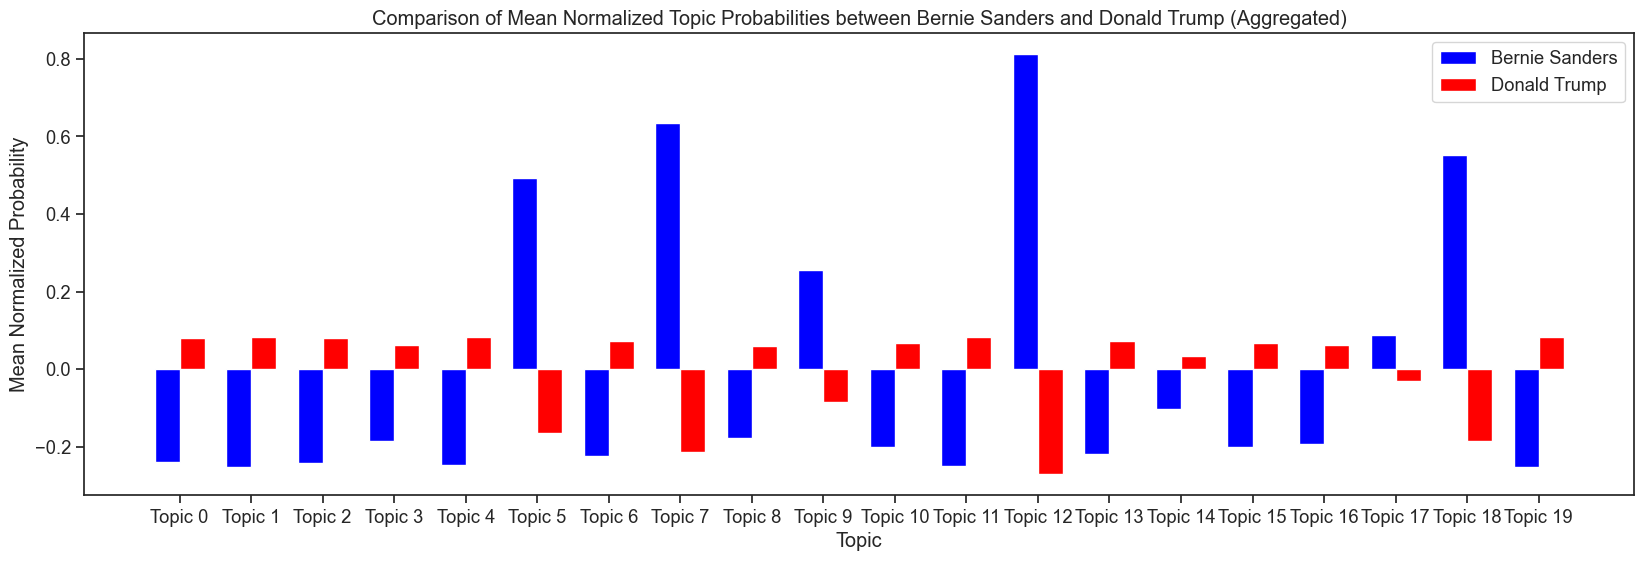

In [65]:
import numpy as np # for numerical operations and array manipulation (https://numpy.org/)

# Aggregate the normalized topic probabilities across all tweets for each politician
sanders_aggregated = sanders_df.mean()
trump_aggregated = trump_df.mean()

# Set the number of topics
num_topics = len(sanders_aggregated)

# Generate topic indices for x-axis
topic_indices = np.arange(num_topics)

# Set the width of the bars
bar_width = 0.35

# Plotting the bar chart for aggregated distributions
plt.figure(figsize=(20, 6))
plt.bar(topic_indices - bar_width/2, sanders_aggregated, bar_width, label='Bernie Sanders', color='blue')
plt.bar(topic_indices + bar_width/2, trump_aggregated, bar_width, label='Donald Trump', color='red')

# Add labels, title, and legend
plt.xlabel('Topic')
plt.ylabel('Mean Normalized Probability')
plt.title('Comparison of Mean Normalized Topic Probabilities between Bernie Sanders and Donald Trump (Aggregated)')
plt.xticks(topic_indices, [f'Topic {i}' for i in range(num_topics)])
plt.legend()

plt.show()

1. Sanders' Focused Topics: Topics 5 (drug change climate energy), 7 (health care people right), 12 (tax workers billion working), and 18 (people must trump war) stand out as prominent themes in Sanders' tweets. These topics reflect Sanders' emphasis on issues related to climate change, healthcare reform, workers' rights, and opposition to war or military intervention, indicating a focus on social justice issues.

2. Trump's Diverse Topics: Donald Trump's tweets cover a wide range of topics, as indicated by the distribution across multiple topics in the topic model. While some topics may not stand out as prominently as Sanders', Trump's tweets cover diverse subjects. 